## Exploratory Data Analysis

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.graph_objects as go

In [3]:
# Load dataset
data_df = pd.read_excel("TV4-1 transformed .xlsx") 
data = pd.read_excel("TV4-1 transformed .xlsx") 


In [4]:
# Set DateTime as the index for both dataframes
for df in [data_df, data]:
    df.set_index('DateTime', inplace=True)


# Changing the data type of the columns in 'data_df'
numeric_columns = data_df.columns[:]
data_df[numeric_columns] = data_df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Rename columns by index
data_df.columns = [
    'Active Power', 
    'Reactive Power SUB', 
    'Reactive Power', 
    'Ia', 
    'Ib', 
    'Ic', 
    'Excitation Current', 
    'Ua', 
    'Ub', 
    'Uc', 
    'Excitation Voltage'
]


In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 525601 entries, 2020-09-01 00:00:00 to 2021-09-01 00:00:00
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Active Power        524408 non-null  float64
 1   Reactive Power SUB  521859 non-null  float64
 2   Reactive Power      524406 non-null  float64
 3   Ia                  524405 non-null  float64
 4   Ib                  524405 non-null  float64
 5   Ic                  524405 non-null  float64
 6   Excitation Current  305986 non-null  float64
 7   Ua                  524404 non-null  float64
 8   Ub                  524404 non-null  float64
 9   Uc                  524404 non-null  float64
 10  Excitation Voltage  305986 non-null  float64
dtypes: float64(11)
memory usage: 48.1 MB


In [6]:
# Check if there is any missing data
missing_data = data_df.isnull().sum()
if missing_data.sum() == 0:
    print("There is no missing data.")
else:
    print("Missing data exists in the following columns:", missing_data[missing_data != 0].index)


Missing data exists in the following columns: Index(['Active Power', 'Reactive Power SUB', 'Reactive Power', 'Ia', 'Ib',
       'Ic', 'Excitation Current', 'Ua', 'Ub', 'Uc', 'Excitation Voltage'],
      dtype='object')


**Plotting the Time Series for some all the variables before doing any transformations on the data.**

- Each subplot is interactive and independent of the others. 
- This allows you to zoom in and out on one plot without affecting the others

In [ ]:
fig = make_subplots(rows=3, cols=1)

fig.append_trace(go.Scatter(
                x=data_df.index,
                y=data_df['Ua'],
                name="Ua",
                line_color='deepskyblue',
                opacity=0.8), row=1, col=1)

fig.append_trace(go.Scatter(
                x=data_df.index,
                y=data_df['Ub'],
                name="Ub",
                line_color='dimgray',
                opacity=0.8), row=2, col=1)

fig.append_trace(go.Scatter(
                x=data_df.index,
                y=data_df['Uc'],
                name="Uc",
                line_color='darkgreen',
                opacity=0.8), row=3, col=1)

fig.update_layout(height=800, width=800, title_text="Stacked Subplots for Ua, Ub, and Uc")
fig.show()

In [ ]:
fig = make_subplots(rows=3, cols=1)

fig.append_trace(go.Scatter(
                x=data_df.index,
                y=data_df['Ia'],
                name="Ia",
                line_color='darkred',
                opacity=0.8), row=1, col=1)

fig.append_trace(go.Scatter(
                x=data_df.index,
                y=data_df['Ib'],
                name="Ib",
                line_color='purple',
                opacity=0.8), row=2, col=1)

fig.append_trace(go.Scatter(
                x=data_df.index,
                y=data_df['Ic'],
                name="Ic",
                line_color='orange',
                opacity=0.8), row=3, col=1)

fig.update_layout(height=800, width=800, title_text="Stacked Subplots for Ia, Ib, and Ic")
fig.show()

In [ ]:
fig = make_subplots(rows=3, cols=1)

fig.append_trace(go.Scatter(
                x=data_df.index,
                y=data_df['Active Power'],
                name="Active Power",
                line_color='yellow',
                opacity=0.8), row=1, col=1)

fig.append_trace(go.Scatter(
                x=data_df.index,
                y=data_df['Reactive Power'],
                name="Reactive Power",
                line_color='lightgreen',
                opacity=0.8), row=2, col=1)

fig.append_trace(go.Scatter(
                x=data_df.index,
                y=data_df['Reactive Power SUB'],
                name="Reactive Power SUB",
                line_color='darkgreen',
                opacity=0.8), row=3, col=1)


fig.update_layout(height=800, width=800, title_text="Stacked Subplots for Active Power, Reactive Power and Reactive Power SUB")
fig.show()

In [ ]:
fig = make_subplots(rows=2, cols=1)

fig.append_trace(go.Scatter(
                x=data_df.index,
                y=data_df['Excitation Voltage'],
                name="Excitation Voltage",
                line_color='pink',
                opacity=0.8), row=1, col=1)

fig.append_trace(go.Scatter(
                x=data_df.index,
                y=data_df['Excitation Current'],
                name="Excitation Current",
                line_color='cyan',
                opacity=0.8), row=2, col=1)

fig.update_layout(height=800, width=800, title_text="Stacked Subplots for Excitation Voltage and Exitation Current")
fig.show()


In [7]:
# Replacing zero values with NaN and drop all rows with NaN values
data_df.replace(0, np.nan, inplace=True)
data_df.dropna(inplace=True)


**Plotting the Time Series for all the original variables after dropping all 0 values and NaN's.**

- Each subplot is interactive and independent of the others. 
- This allows you to zoom in and out on one plot without affecting the others

In [ ]:
fig = make_subplots(rows=3, cols=1)

fig.append_trace(go.Scatter(
                x=data_df.index,
                y=data_df['Ua'],
                name="Ua",
                line_color='deepskyblue',
                opacity=0.8), row=1, col=1)

fig.append_trace(go.Scatter(
                x=data_df.index,
                y=data_df['Ub'],
                name="Ub",
                line_color='dimgray',
                opacity=0.8), row=2, col=1)

fig.append_trace(go.Scatter(
                x=data_df.index,
                y=data_df['Uc'],
                name="Uc",
                line_color='darkgreen',
                opacity=0.8), row=3, col=1)

fig.update_layout(height=800, width=800, title_text="Stacked Subplots for Ua, Ub, and Uc")
fig.show()

In [ ]:
fig = make_subplots(rows=3, cols=1)

fig.append_trace(go.Scatter(
                x=data_df.index,
                y=data_df['Ia'],
                name="Ia",
                line_color='darkred',
                opacity=0.8), row=1, col=1)

fig.append_trace(go.Scatter(
                x=data_df.index,
                y=data_df['Ib'],
                name="Ib",
                line_color='purple',
                opacity=0.8), row=2, col=1)

fig.append_trace(go.Scatter(
                x=data_df.index,
                y=data_df['Ic'],
                name="Ic",
                line_color='orange',
                opacity=0.8), row=3, col=1)

fig.update_layout(height=800, width=800, title_text="Stacked Subplots for Ia, Ib, and Ic")
fig.show()

In [ ]:
fig = make_subplots(rows=3, cols=1)

fig.append_trace(go.Scatter(
                x=data_df.index,
                y=data_df['Active Power'],
                name="Active Power",
                line_color='yellow',
                opacity=0.8), row=1, col=1)

fig.append_trace(go.Scatter(
                x=data_df.index,
                y=data_df['Reactive Power'],
                name="Reactive Power",
                line_color='lightgreen',
                opacity=0.8), row=2, col=1)

fig.append_trace(go.Scatter(
                x=data_df.index,
                y=data_df['Reactive Power SUB'],
                name="Reactive Power SUB",
                line_color='darkgreen',
                opacity=0.8), row=3, col=1)


fig.update_layout(height=800, width=800, title_text="Stacked Subplots for Active Power, Reactive Power and Reactive Power SUB")
fig.show()

In [ ]:
# Create subplots: 10 rows
fig = make_subplots(rows=2, cols=1)

fig.append_trace(go.Scatter(
                x=data_df.index,
                y=data_df['Excitation Voltage'],
                name="Excitation Voltage",
                line_color='pink',
                opacity=0.8), row=1, col=1)

fig.append_trace(go.Scatter(
                x=data_df.index,
                y=data_df['Excitation Current'],
                name="Excitation Current",
                line_color='cyan',
                opacity=0.8), row=2, col=1)

fig.update_layout(height=800, width=800, title_text="Stacked Subplots for Excitation Voltage and Exitation Current")
fig.show()


In [8]:
# Computing differences between different currents
data_df['Diff Ia-Ib'] = data_df['Ia'] - data_df['Ib']
data_df['Diff Ib-Ic'] = data_df['Ib'] - data_df['Ic']
data_df['Diff Ic-Ia'] = data_df['Ic'] - data_df['Ia']

# Creating the Apparent power column
data_df['Apparent Power'] = np.sqrt(data_df['Active Power']**2 + data_df['Reactive Power']**2)

# Creating the 'k' factor column
data_df['k'] = data_df['Active Power']/data_df['Apparent Power']

# Compute RMS current and voltage
data_df['I RMS'] = np.sqrt((data_df['Ia']**2 + data_df['Ib']**2 + data_df['Ic']**2) / 3)
data_df['U RMS'] = np.sqrt((data_df['Ua']**2 + data_df['Ub']**2 + data_df['Uc']**2) / 3)

# Compute Line-to-Line voltage RMS and current RMS
data_df['Line Voltage RMS'] = np.sqrt(3) * data_df['U RMS']
data_df['Line Current RMS'] = data_df['I RMS']  # In a balanced system, line current = phase current


**Plotting the Time Series for the new variables we created.** 

- This plots are done after the 0's and the NaN's are dropped.
- Each subplot is interactive and independent of the others. 
- This allows you to zoom in and out on one plot without affecting the others

In [ ]:
fig = make_subplots(rows=3, cols=1)

fig.append_trace(go.Scatter(
                x=data_df.index,
                y=data_df['Diff Ia-Ib'],
                name="Diff Ia-Ib",
                line_color='deepskyblue',
                opacity=0.8), row=1, col=1)

fig.append_trace(go.Scatter(
                x=data_df.index,
                y=data_df['Diff Ib-Ic'],
                name="Diff Ib-Ic",
                line_color='dimgray',
                opacity=0.8), row=2, col=1)

fig.append_trace(go.Scatter(
                x=data_df.index,
                y=data_df['Diff Ic-Ia'],
                name="Diff Ic-Ia",
                line_color='darkgreen',
                opacity=0.8), row=3, col=1)

fig.update_layout(height=800, width=800, title_text="Current Differences")
fig.show()


In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(
                x=data_df.index,
                y=data_df['Apparent Power'],
                name="Apparent Power",
                line_color='darkred',
                opacity=0.8))

fig.update_layout(height=400, width=800, title_text="Apparent Power")
fig.show()


In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(
                x=data_df.index,
                y=data_df['k'],
                name="k factor",
                line_color='purple',
                opacity=0.8))

fig.update_layout(height=400, width=800, title_text="k Factor")
fig.show()


In [ ]:
fig = make_subplots(rows=2, cols=1)

fig.append_trace(go.Scatter(
                x=data_df.index,
                y=data_df['I RMS'],
                name="I RMS",
                line_color='orange',
                opacity=0.8), row=1, col=1)

fig.append_trace(go.Scatter(
                x=data_df.index,
                y=data_df['U RMS'],
                name="U RMS",
                line_color='pink',
                opacity=0.8), row=2, col=1)

fig.update_layout(height=800, width=800, title_text="RMS Current and Voltage")
fig.show()


In [ ]:
fig = make_subplots(rows=2, cols=1)

fig.append_trace(go.Scatter(
                x=data_df.index,
                y=data_df['Line Voltage RMS'],
                name="Line Voltage RMS",
                line_color='cyan',
                opacity=0.8), row=1, col=1)

fig.append_trace(go.Scatter(
                x=data_df.index,
                y=data_df['Line Current RMS'],
                name="Line Current RMS",
                line_color='yellow',
                opacity=0.8), row=2, col=1)

fig.update_layout(height=800, width=800, title_text="Line-to-Line RMS Voltage and Current")
fig.show()


**Correlations with the Exitation Current**

In [10]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 294849 entries, 2021-02-05 01:04:00 to 2021-08-28 23:56:00
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Active Power        294849 non-null  float64
 1   Reactive Power SUB  294849 non-null  float64
 2   Reactive Power      294849 non-null  float64
 3   Ia                  294849 non-null  float64
 4   Ib                  294849 non-null  float64
 5   Ic                  294849 non-null  float64
 6   Excitation Current  294849 non-null  float64
 7   Ua                  294849 non-null  float64
 8   Ub                  294849 non-null  float64
 9   Uc                  294849 non-null  float64
 10  Excitation Voltage  294849 non-null  float64
 11  Diff Ia-Ib          294849 non-null  float64
 12  Diff Ib-Ic          294849 non-null  float64
 13  Diff Ic-Ia          294849 non-null  float64
 14  Apparent Power      294849 non-null  float64
 15  

In [ ]:
# Calculate correlation
corr = data_df.corr()

# Get correlations with 'Excitation Current'
excitation_corr = corr['Line Current RMS']

# Drop the 'Excitation Current' itself
excitation_corr = excitation_corr.drop('Line Current RMS')

# Sort the correlations
excitation_corr = excitation_corr.sort_values()

# Normalize the correlations to range between 0 and 1
normalized_corr = (excitation_corr - excitation_corr.min()) / (excitation_corr.max() - excitation_corr.min())

# Create a colors array based on correlation values
colors = plt.cm.coolwarm(normalized_corr)
colors = colors[:, :3]  # Remove the alpha channel
colors = ['rgb(' + ', '.join(map(str, [int(color * 255) for color in rgb])) + ')' for rgb in colors]  # Convert to RGB strings

# Create bar plot
fig = go.Figure(go.Bar(
            x=excitation_corr.values,
            y=excitation_corr.index,
            orientation='h',
            marker_color=colors))  # Pass colors to marker_color

fig.update_layout(title_text='Correlation of features with Excitation Current',
                  xaxis_title="Correlation",
                  yaxis_title="Feature",
                  height=450)  # Increase the height of the plot

fig.show()


In [12]:
data_df['k'].describe()

count    294849.000000
mean          0.982039
std           0.032776
min          -0.994827
25%           0.982545
50%           0.995264
75%           0.998264
max           1.000000
Name: k, dtype: float64

**Outliers detection and elimination**

1. **Outlier Identification**:

    - Given the minimum k factor = 0.85, to find and remove outliers, a 'k' factor less than 0.87 was used as a threshold.
    - Given the mean k factor = 0.99, we also decided to look for outliers when the k factor reaches it's higher levels.
    - Given the maximum k factor = 1.00, to find and remove outliers, a 'k' factor more than 0.98 was also used as a threshold.
    - Points falling below this threshold were considered as potential candidates for outliers and stored the "outside_range" dataframe

2. **Important Assumption**: The outliers detection strategy that follows was based in the assumption that the observations initially dropped were moments the data was incorrect due to  possible faliours of the machine.

3. **Dataframe Comparisons**: The time indices of "data" and "data_df" were compared to find moments when the machine was failing (timestamps present in "data" but not in "data_df"). These were stored in the "machine_fail" series.

4. **Gap Analysis**: We then identified gaps in the DateTime index of the "outside_range" dataframe, where the 'k' factor was below or above our thresholds. These gaps were cross-referenced with the "machine_fail" series to determine if these gaps were indeed times of machine failure.

**To identify the potential outliers using the k factor for this machine, we will present 2 different combinations of an upper and lower threshold**
- Option A: 0.77 < k < 0.999997777 observations falling outside this range will be outliers
- Option B: 0.89 < k < 0.98 observations falling outside this range will be outliers

**Option A**:
- Number 1: those observations with k < 0.77 will be considered outliers
- Number 2: those observations with k > 0.999997777 will be considered outliers

In [13]:
# Finding and dropping outliers based on 'k' factor
outside_range_1_A = data_df[data_df['k'] < 0.77]
outside_range_2_A = data_df[data_df['k'] > 0.999997777]

# Finding DateTime index values that exist in 'data' but not in 'data_df' (machine failures)
missing_index_values = data.index.difference(data_df.index)
machine_fail = pd.Series(missing_index_values, name="machine_fail")

# Gap analysis in the outside_range DataFrame OPTION #1 and cross-verification with machine failures
complete_index_1_A = pd.date_range(start=outside_range_1_A.index.min(), end=outside_range_1_A.index.max(), freq='1Min')
outside_range_gaps_1_A = complete_index_1_A.difference(outside_range_1_A.index)
gaps_filled_by_machine_fail_1_A = outside_range_gaps_1_A.intersection(machine_fail)

# Gap analysis in the outside_range DataFrame OPTION #2 and cross-verification with machine failures
complete_index_2_A = pd.date_range(start=outside_range_2_A.index.min(), end=outside_range_2_A.index.max(), freq='1Min')
outside_range_gaps_2_A = complete_index_2_A.difference(outside_range_2_A.index)
gaps_filled_by_machine_fail_2_A = outside_range_gaps_2_A.intersection(machine_fail)

In [14]:
# Summarize analysis
print('Number of Observations Droped: ',machine_fail.value_counts().sum())
print(' ')
print('For option number 1, with k < 0.77:')
print('Number of Observations with k Factor < 0.77: ',outside_range_1_A.value_counts().sum())
print('Number of Observations droped that have k Factor < 0.77: ',gaps_filled_by_machine_fail_1_A.value_counts().sum())
print(' ')
print('For option number 2, with k > 0.999997777:')
print('Number of Observations with k Factor > 0.999997777: ',outside_range_2_A.value_counts().sum())
print('Number of Observations droped that have k Factor > 0.999997777: ',gaps_filled_by_machine_fail_2_A.value_counts().sum())

Number of Observations Droped:  230692
 
For option number 1, with k < 0.77:
Number of Observations with k Factor < 0.77:  228
Number of Observations droped that have k Factor < 0.77:  224
 
For option number 2, with k > 0.999997777:
Number of Observations with k Factor > 0.999997777:  922
Number of Observations droped that have k Factor > 0.999997777:  92


**Option B**:
- Number 1: those observations with k < 0.89 will be considered outliers
- Number 2: those observations with k > 0.98 will be considered outliers

In [15]:
# Finding and dropping outliers based on 'k' factor
outside_range_1_B = data_df[data_df['k'] < 0.80]
outside_range_2_B = data_df[data_df['k'] > 0.98]

# Finding DateTime index values that exist in 'data' but not in 'data_df' (machine failures)
missing_index_values = data.index.difference(data_df.index)
machine_fail = pd.Series(missing_index_values, name="machine_fail")

# Gap analysis in the outside_range DataFrame OPTION #1 and cross-verification with machine failures
complete_index_1_B = pd.date_range(start=outside_range_1_B.index.min(), end=outside_range_1_B.index.max(), freq='1Min')
outside_range_gaps_1_B = complete_index_1_B.difference(outside_range_1_B.index)
gaps_filled_by_machine_fail_1_B = outside_range_gaps_1_B.intersection(machine_fail)

# Gap analysis in the outside_range DataFrame OPTION #2 and cross-verification with machine failures
complete_index_2_B = pd.date_range(start=outside_range_2_B.index.min(), end=outside_range_2_B.index.max(), freq='1Min')
outside_range_gaps_2_B = complete_index_2_B.difference(outside_range_2_B.index)
gaps_filled_by_machine_fail_2_B = outside_range_gaps_2_B.intersection(machine_fail)

In [16]:
# Summarize analysis
print('Number of Observations Droped: ',machine_fail.value_counts().sum())
print(' ')
print('For option number 1, with k < 0.80:')
print('Number of Observations with k Factor < 0.80: ',outside_range_1_B.value_counts().sum())
print('Number of Observations droped that have k Factor < 0.80: ',gaps_filled_by_machine_fail_1_B.value_counts().sum())
print(' ')
print('For option number 2, with k > 0.98:')
print('Number of Observations with k Factor > 0.98: ',outside_range_2_B.value_counts().sum())
print('Number of Observations droped that have k Factor > 0.98: ',gaps_filled_by_machine_fail_2_B.value_counts().sum())

Number of Observations Droped:  230692
 
For option number 1, with k < 0.80:
Number of Observations with k Factor < 0.80:  417
Number of Observations droped that have k Factor < 0.80:  224
 
For option number 2, with k > 0.98:
Number of Observations with k Factor > 0.98:  229075
Number of Observations droped that have k Factor > 0.98:  92


- The output suggests that the power factor 'k', being an indicator of the efficiency of power usage, is very likely related with the moments the machine fails (observations dropped).

- The efficiency is mostly quite high (mean 'k' is 0.98), but there are some significant deviations.

- Specifically, when 'k' is less than 0.77, there are 228 obs with such k factor and, out of those, 224 belong to the time span where we belive the machine failed (the obs dropped initially)

- Also, when 'k' is more than 0.999997777, there are 922 obs with such k factor and, out of those, 92 belong to the time span where we belive the machine failed (the obs dropped initially)

- However, a slighly increase in both the upper and lower threshold seems to indicate that we found the optimal values for the k factor threshold: 
    - when k factor is less than 0.80, we have the same number overlaps (224) but the number of obs that are considered outliers but don't belong to the time span of machine faliours increses to 417.
    - and also, when k factor is more than 0.98, we have the same number overlaps (92) but the number of obs that are considered outliers but don't belong to the time span of machine faliours increses exponentially to to 229075.

- These findings could be used to predict future failures based on monitoring the power factor.

In [17]:
#Creating a new dataframe, new_df, with only the observations where 0.77 < k < 0.999997777

new_df = data_df[(data_df['k'] > 0.77) & (data_df['k'] < 0.999997777)]

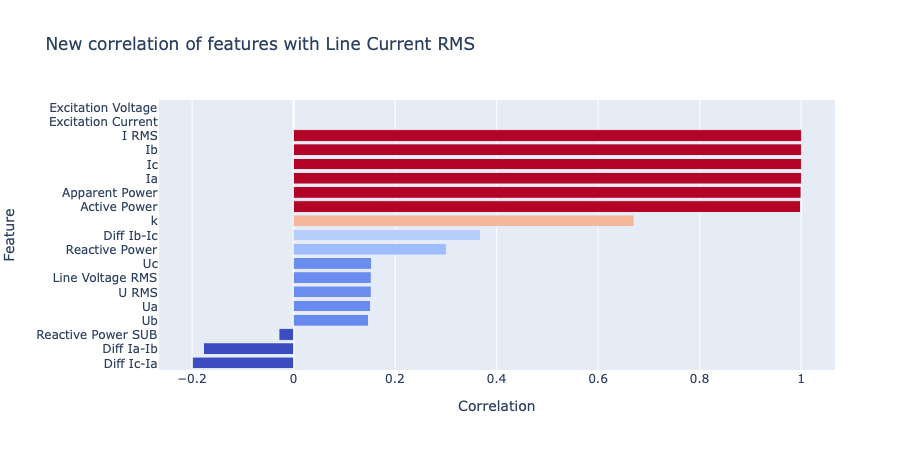

In [18]:
# Calculate the new correlations
new_corr = new_df.corr()

# Get correlations with 'Excitation Current'
new_excitation_corr = new_corr['Line Current RMS']

# Drop the 'Excitation Current' itself
new_excitation_corr = new_excitation_corr.drop('Line Current RMS')

# Sort the correlations
new_excitation_corr = new_excitation_corr.sort_values()

# Normalize the correlations to range between 0 and 1
new_normalized_corr = (new_excitation_corr - new_excitation_corr.min()) / (new_excitation_corr.max() - new_excitation_corr.min())

# Create a colors array based on correlation values
colors = plt.cm.coolwarm(new_excitation_corr)
colors = colors[:, :3]  # Remove the alpha channel
colors = ['rgb(' + ', '.join(map(str, [int(color * 255) for color in rgb])) + ')' for rgb in colors]  # Convert to RGB strings

# Create bar plot
fig = go.Figure(go.Bar(
            x=new_excitation_corr.values,
            y=new_excitation_corr.index,
            orientation='h',
            marker_color=colors))  # Pass colors to marker_color

fig.update_layout(title_text='New correlation of features with Line Current RMS',
                  xaxis_title="Correlation",
                  yaxis_title="Feature",
                  height=450)  # Increase the height of the plot

fig.show()


In [19]:
# Create a dataframe from the two series to compare the correlations before and after removing outliers
correlation_df = pd.DataFrame({
    'excitation_corr': excitation_corr,
    'new_excitation_corr': new_excitation_corr
})

# Creating a third column to see the change in the correlation for each feature
correlation_df['change_in_corr'] = correlation_df['new_excitation_corr'] - correlation_df['excitation_corr']

# Sort dataframe by absolute value of 'change_in_corr'
correlation_df = correlation_df.assign(abs_change_in_corr=correlation_df['change_in_corr'].abs()).sort_values(by='abs_change_in_corr', ascending=False)

# Calculate percentage change in correlation
correlation_df['perc_change_in_corr'] = (correlation_df['new_excitation_corr'] - correlation_df['excitation_corr']) / np.abs(correlation_df['excitation_corr']) * 100

correlation_df

,excitation_corr,new_excitation_corr,change_in_corr,abs_change_in_corr,perc_change_in_corr
k,0.601349,0.670423,6.907466e-02,6.907466e-02,11.486627
U RMS,0.130882,0.152476,2.159374e-02,2.159374e-02,16.498627
Line Voltage RMS,0.130882,0.152476,2.159374e-02,2.159374e-02,16.498627
Uc,0.132412,0.153708,2.129553e-02,2.129553e-02,16.082765
Ua,0.130766,0.151711,2.094443e-02,2.094443e-02,16.016701
Ub,0.127076,0.147521,2.044527e-02,2.044527e-02,16.089039
Reactive Power SUB,-0.031598,-0.028642,2.956375e-03,2.956375e-03,9.356080
Reactive Power,0.298261,0.300465,2.204114e-03,2.204114e-03,0.738988
Diff Ic-Ia,-0.200409,-0.198650,1.758466e-03,1.758466e-03,0.877440
Diff Ib-Ic,0.370327,0.368643,-1.684258e-03,1.684258e-03,-0.454803


In [20]:
new_df['Excitation Current']

DateTime
2021-02-05 01:08:00   -687.5
2021-02-05 01:09:00   -687.5
2021-02-05 01:10:00   -687.5
2021-02-05 01:11:00   -687.5
2021-02-05 01:12:00   -687.5
                       ...  
2021-08-28 23:51:00   -687.5
2021-08-28 23:52:00   -687.5
2021-08-28 23:53:00   -687.5
2021-08-28 23:54:00   -687.5
2021-08-28 23:55:00   -687.5
Name: Excitation Current, Length: 293699, dtype: float64

## Data Preprocessing

Before we can feed the data into an LSTM model, we need to preprocess it. This involves:

1. Normalizing the data: LSTMs are sensitive to the scale of input data. We'll use Scikit-Learn's `MinMaxScaler` to scale our data to the range [0, 1].
2. Reshaping the data: LSTMs expect input data in a specific 3D format of [samples, time steps, features].
3. Splitting the data into training and test sets: We'll train our model on one portion of the data, and then test it on another portion to evaluate its performance.

In [22]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Define the feature variables (X) and the target variable (y)
columns_to_drop = ['Excitation Current', 'U RMS', 'Line Voltage RMS']
X = new_df.drop(columns=columns_to_drop)  # Feature Variables
y = new_df['Excitation Current']  # Target Variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Define the scaler
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [23]:
# Reshape the input data to be 3-dimensional [samples, timesteps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


## Building the LSTM Model for Time-Series Prediction

In this section, we are constructing our LSTM model to predict the future values in our time-series data. The model is built using the Keras library, which provides a high-level, user-friendly API for defining and training neural networks.

This LSTM model is designed to learn the temporal dependencies in our data, and use this learning to predict future values of the 'Excitation Current'. The better it can learn these dependencies, the more accurate its predictions will be, and the better it will serve our purpose of detecting anomalies in the generator's operation.

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, RepeatVector, TimeDistributed

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

2023-07-10 12:55:00.242368: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Training the Model

Now that we have defined our LSTM model, the next step is to train it on our data. Training a model is essentially the process of feeding our data into the model and allowing it to adjust its internal parameters to best map the input data to the correct output. This is done through a process called backpropagation and gradient descent.

In [25]:
model.fit(X_train, y_train, epochs=50 ,batch_size=32, verbose=1)

Epoch 1/50
7343/7343 [==============================] - 83s 11ms/step - loss: 3686.9453
Epoch 2/50
7343/7343 [==============================] - 86s 12ms/step - loss: 40.5155
Epoch 3/50
7343/7343 [==============================] - 105s 14ms/step - loss: 34.0997
Epoch 4/50
7343/7343 [==============================] - 86s 12ms/step - loss: 28.8717
Epoch 5/50
7343/7343 [==============================] - 76s 10ms/step - loss: 24.1246
Epoch 6/50
7343/7343 [==============================] - 77s 10ms/step - loss: 20.5693
Epoch 7/50
7343/7343 [==============================] - 82s 11ms/step - loss: 17.4060
Epoch 8/50
7343/7343 [==============================] - 82s 11ms/step - loss: 14.8390
Epoch 9/50
7343/7343 [==============================] - 95s 13ms/step - loss: 12.7723
Epoch 10/50
7343/7343 [==============================] - 79s 11ms/step - loss: 11.1829
Epoch 11/50
7343/7343 [==============================] - 76s 10ms/step - loss: 9.8163
Epoch 12/50
7343/7343 [===========================

In [ ]:
# Generate predictions on the test set
y_pred = model.predict(X_test)

# Calculate the number of time steps per sample
time_steps_per_sample = y_pred.shape[1]

# Reshape y_test and y_pred for comparison
y_test_flattened = np.repeat(y_test.values, time_steps_per_sample)
y_pred_flattened = y_pred.reshape(-1)

# Calculate the mean squared error of the predictions
mse = np.mean((y_test_flattened - y_pred_flattened)**2)
print('Mean Squared Error on Test Set:', mse)

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test_flattened, label='Actual')
plt.plot(y_pred_flattened, label='Predicted')
plt.legend()
plt.show()

In [27]:
import math

rmse = math.sqrt(mse)
print('Root Mean Squared Error on Test Set:', rmse)

Root Mean Squared Error on Test Set: 1.7223396011513414


### Saving/Loading the model

In [ ]:
# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.
model.save('CH_1.h5')

In [ ]:
from tensorflow.keras.models import load_model

# Recreate the exact same model, including its weights and the optimizer
new_model = load_model('CH_1.h5')

# Show the model architecture
new_model.summary()